# Project : Holiday weather for Moscow in 2014
There is nothing I like better than taking a holiday. In this project I am going to use the historic weather data from the Weather Underground for moscow to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

Getting the data
Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'.

When the next page opens with moscow Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page.

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. I have therefore collated the whole 2014 data in the provided 'Moscow_SVO_2014.csv' file which can be found in the project folder.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
moscow = pd.read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)

from datetime import datetime

# Cleaning the data
First we need to clean up the data. I'm not going to make use of 'WindDirDegrees' in my analysis, it will be renamed 'WindDirDegrees< br />' to 'WindDirDegrees'.

In [2]:
moscow = moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

Remove the < br /> html line breaks from the values in the 'WindDirDegrees' column.

In [3]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')

All the values in the 'WindDirDegrees' column will be changed to float64:

In [4]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the 'Date' column into values of the datetime64 date type.

In [5]:
moscow['Date'] = pd.to_datetime(moscow['Date'])

We also need to change the index from the default to the datetime64 values in the 'Date' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [6]:
moscow.index = moscow['Date']

# Finding a summer break
According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the datetime index, like this:

In [7]:
summer = moscow.loc[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [8]:
summer[summer['Mean TemperatureC'] >= 25]
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,26,18,10,9,5,1,76,42,20,...,9.0,9.0,9.0,32,18,47.0,0.0,3.0,NaN,116.0
2014-06-02,2014-06-02,27,22,17,12,8,4,68,42,23,...,10.0,10.0,10.0,29,16,43.0,0.0,7.0,Rain,115.0
2014-06-03,2014-06-03,29,20,12,11,6,3,77,40,19,...,NaN,NaN,NaN,21,13,35.0,0.0,NaN,NaN,137.0
2014-06-04,2014-06-04,29,20,11,12,8,2,82,45,18,...,8.0,8.0,8.0,26,11,43.0,0.0,1.0,NaN,108.0
2014-06-05,2014-06-05,31,22,14,14,8,2,77,44,16,...,NaN,NaN,NaN,18,10,35.0,0.0,NaN,NaN,116.0


Summer 2014 was rather cool in moscow: there are no days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [9]:
%matplotlib inline

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

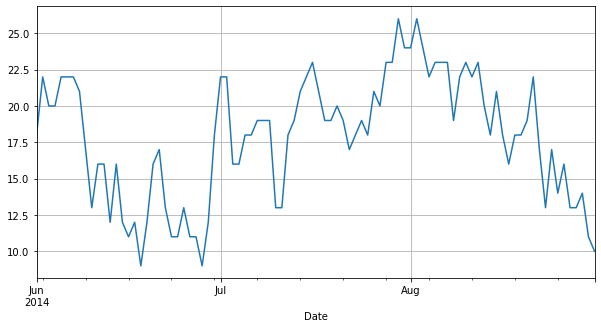

In [10]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))


Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

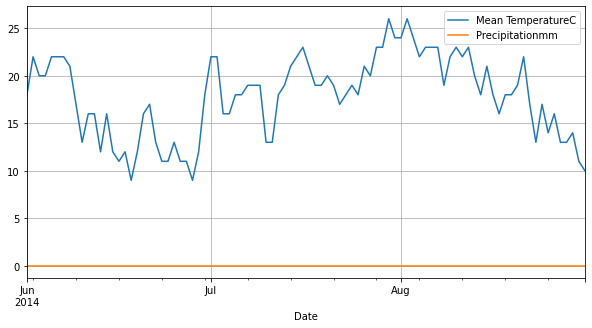

In [11]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The late half of july and first half of August is still looking good, with just a couple of peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for July and August.

<AxesSubplot:xlabel='Date'>

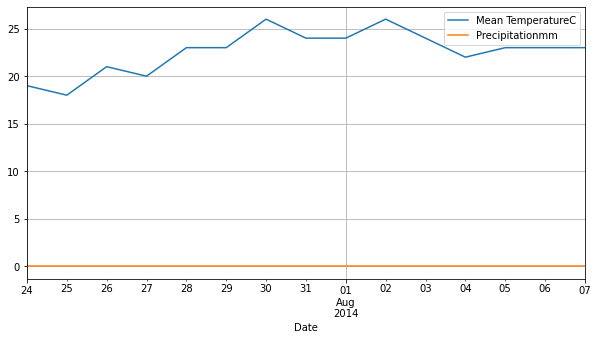

In [12]:
july_aug = summer.loc[datetime(2014,7,24) : datetime(2014,8,7)]
july_aug[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes,  last week of July and first week of August looks pretty good, no rain at all and temperature almost allways above 20

# Conclusions
The graphs have shown the volatility of a Russsian summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. By the time you have finished this course you should be able to do that.